In [44]:
import os
import re
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from PIL import Image

In [2]:
path = "../eye_data/"

In [ ]:
for subdir, dirs, files in os.walk(path):
        for file in files:
            if file == '.DS_Store' or file == 'eyedata.mat':
                continue
            if file.endswith(".mat"):
                #print("File:", file)
                sub = re.findall(r'\d+', file)[0] #'^[0-9]+'  search gives only re.match object which is not iterable
                #print("SUBJECT", int(sub))
                data = sio.loadmat(os.path.join(subdir, file))
                sub_trial = data['timelock'][0][0][3]
                time = data['timelock'][0][0][0]
                print(time.shape, time[0])
                test = time[0]
                i, = np.where(np.isclose(test, 0))
                j, = np.where(np.isclose(test, 5))
                print(i, j)
                print(test[300:801].shape) ## items start through stop-1
              #  print("Sub Trial Channels 4 and 5", sub_trial.shape, sub_trial[:,[4,5]])
                t = sub_trial[:,[4,5]]
                print(t.shape)
                t = t[:,:,300:801]
                print(t, t.shape)
                stop
                #plt.scatter(sub_trial[:,[4]], sub_trial[:,[5]])
                #plt.show()

In [ ]:
print(np.unique(sub_trial[:, [1, 2], :]))
marker_size=1
fig = plt.figure(figsize=(10,5))
plt.scatter(sub_trial[:,1,:], sub_trial[:,2,:], marker_size)
plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter
from PIL import Image
x_edges = np.linspace(192, 832, num=456) 
y_edges = np.linspace(144, 624, num=342)
for i in range(0,150):
    img = sub_trial[i]
    img_fin = img[[1, 2], :]
    #fig = plt.figure(figsize=(20,10))
    #plt.scatter(img_fin[0], img_fin[1], marker_size)
    #plt.show()
    hist, xedges, yedges = np.histogram2d(img_fin[0], img_fin[1], bins=[x_edges, y_edges]) #,density=True
    print(np.unique(hist), np.amin(hist), np.amax(hist))
    print(hist)
    H = hist.T
    #H_flipped = np.flipud(hist)
    #print("Histogram flipped:", H)
    H_smoothed_5 = gaussian_filter(H, sigma=5)
    print("smoothed hist", H_smoothed_5, H_smoothed_5.shape)
    #fig = plt.figure(figsize=(20,10))
    #ax = fig.add_subplot(1, 2, 1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    im = ax1.imshow(H_smoothed_5, interpolation='nearest', origin = 'lower', extent=[xedges[0], xedges[-1],yedges[0],yedges[-1]], cmap=plt.cm.jet)
    sns.distplot(H_smoothed_5,  ax=ax2)
    fig.colorbar(im, ax=ax1)
    plt.tight_layout()
    plt.show()
    stop


In [ ]:
#df = pd.read_pickle('FDMs_all_sub')
#participant_info = pd.read_pickle('../eye_data/participant_info')

In [ ]:
#print(participant_info)
#8*150 = 1200 * 88 = 105,600
#sub = participant_info['Subject'].repeat(1200)
#group = participant_info['group'].repeat(1200)
#group_info_df = pd.concat([sub, group], axis=1)

In [2]:
#group_info_df['Subject']= group_info_df['Subject'].astype(str).astype(int)
#print(group_info_df.dtypes)
df_f = pd.read_pickle('All_sub_all_data')
df_f

,FDM,Deep_gaze,pic,cat,sub,pearson,rho,group
0,17.0,0.000004,33.0,3.0,9,0.152293,0.122757,young
1,9.0,0.000006,33.0,3.0,9,0.152293,0.122757,young
2,40.0,0.000004,33.0,3.0,9,0.152293,0.122757,young
3,62.0,0.000008,33.0,3.0,9,0.152293,0.122757,young
4,0.0,0.000009,33.0,3.0,9,0.152293,0.122757,young
...,...,...,...,...,...,...,...,...
3,0.0,0.000006,57.0,3.0,101,0.598345,0.439155,old
4,22.0,0.000008,57.0,3.0,101,0.598345,0.439155,old
5,0.0,0.000005,57.0,3.0,101,0.598345,0.439155,old
6,10.0,0.000006,57.0,3.0,101,0.598345,0.439155,old


In [3]:
#8*150*88 = 105600
#df=df.rename(columns = {'sub':'Subject'})
#df['group'] = group.values
#print(df)
#df.to_pickle('All_sub_all_data')
df_fi = df_f[df_f['sub'] != 99]
df_fi

,FDM,Deep_gaze,pic,cat,sub,pearson,rho,group
0,17.0,0.000004,33.0,3.0,9,0.152293,0.122757,young
1,9.0,0.000006,33.0,3.0,9,0.152293,0.122757,young
2,40.0,0.000004,33.0,3.0,9,0.152293,0.122757,young
3,62.0,0.000008,33.0,3.0,9,0.152293,0.122757,young
4,0.0,0.000009,33.0,3.0,9,0.152293,0.122757,young
...,...,...,...,...,...,...,...,...
3,0.0,0.000006,57.0,3.0,101,0.598345,0.439155,old
4,22.0,0.000008,57.0,3.0,101,0.598345,0.439155,old
5,0.0,0.000005,57.0,3.0,101,0.598345,0.439155,old
6,10.0,0.000006,57.0,3.0,101,0.598345,0.439155,old


Group by image and then average over all subjects for each image

In [ ]:
#final_df = pd.merge(df,group_info_df, on='Subject', how="left")
#final_df

In [4]:
print(len(df_fi['sub'].unique()))
print(len(df_fi['cat'].unique()))

87
5


In [ ]:
#data = df.groupby('group')
#data['rho'].hist( alpha=0.5, legend=True)

In [ ]:
df_group = df_fi.groupby('group')
for name, group in df_group:
    print(name)
    print(group.describe())

In [6]:
def get_img_path(name):
    cat = {
    "fractals" : 1,
    "landscapes" : 2,
    "naturals1" : 3,
    "streets1" : 4,
    "streets2" : 5
    }
    #have to change tuple to list to allow for value assignment later on
    lst = list(name)

    #print("Categories", cat)
    for key, value in cat.items():
        if lst[0] == value:
            # if category of pic is matched in dictonary assign key (cat name) to first value
            lst[0]=key

    pic =  int(lst[1])
    if lst[0] in ('landscapes', 'streets2'):
        path_img = os.path.join(pic_path, lst[0], 'image'+str(pic)+'.png')
    else:
        path_img = os.path.join(pic_path, lst[0], str(pic)+'.bmp')

    return path_img, lst[0]

In [46]:
def getImage(path):
    return OffsetImage(plt.imread(path))


old
young


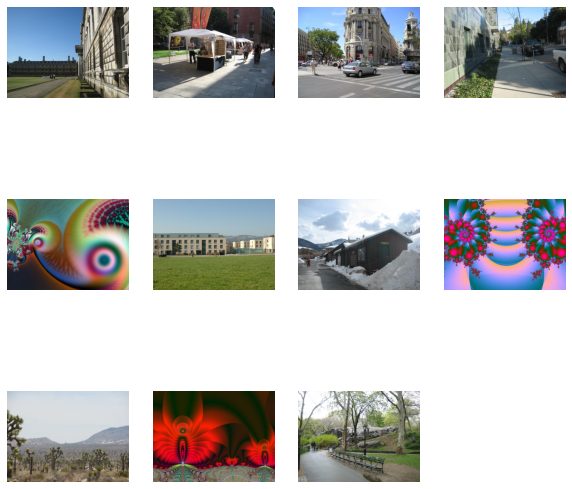

'fig, ax = plt.subplots(figsize=(12,10))\nax.scatter(r_old, r_young)\n\nfor x0, y0, path in zip(r_old, r_young, paths):\n    #print(x0, y0)\n    image = plt.imread(path)\n    im = OffsetImage(image, zoom=72./1000)\n    #im = getImage(path)\n    ab = AnnotationBbox(im, (x0, y0), frameon=False)\n    ax.add_artist(ab)\n    ax.set(xlabel="OA Spearman value", ylabel="YA Spearman value")\n    #ax.annotate(\'({:.2f}, {:.2f})\'.format(x0, y0), xy=(x0, y0), xytext=(-20, 20), textcoords=\'offset points\')\nstart, end = ax.get_xlim()\nprint(start, end)\nax.set_ylim(start, end)\nplt.tight_layout()\nplt.show()\n    \nfig.savefig(\'OA_vs_YA_r_per_img.png\')'

In [60]:
df_group = df_fi.groupby('group')
pic_path = "../../../stimuli_640x480/"

for name, group in df_group:
    print(name)

    bysub = group.groupby(['cat','pic']) 
    #print(bysub.groups.keys())
    r_vals = []
    p_vals = []
    paths= []
    for key in bysub.groups.keys():
        #42*8 = 336
       # print(bysub.get_group(key))
       # print(key)
        img_path, pic_cat = get_img_path(key)
        img = mpimg.imread(img_path)
        #print(img_path, pic_cat)
        r = bysub.get_group(key).rho.mean()
        p = bysub.get_group(key).pearson.mean()
        if r >= 0.5:
            r_vals.append(r)
            paths.append(img_path)
            #print(pic_cat,key[1],r)
            #plt.imshow(img)
            #plt.axis('off')
            #plt.title("Corr val for img {} {} is {:.2f}".format(pic_cat,key[1],r))
            #plt.show()
       # paths.append(img_path)
        #r_vals.append(r)
        #p_vals.append(p)
        
    #print(name)
    #print(len(r_vals))
    #print(paths)
    if name == 'old':
        p_old = paths
        #r_old = r_vals
    if name == 'young':
        p_young = paths
        #r_young = r_vals
    #plt.hist((r_vals, p_vals),label = ("rho", "pearson")) 
    #plt.xlabel('correlation')
    #plt.title("Correlation distribution within subject overall image")
    #plt.legend()
    #plt.savefig('corr_within_sub_{}.png'.format(name))
    #plt.show()

lst = list(set(p_old).intersection(p_young))
#a = set(p_old)
#b = set(p_young)
#lst = list(set(p_young).difference(p_old))
#lst = (list(b - a), list(a - b))
#print(lst)
    

#for l in lst:
fig=plt.figure(figsize=(10, 10))
#if len(l) == 4:
 #   title = "Young"
#else:
columns = 4
rows = 3
#    title = "Old"
for i in range(1, 12): #len(l)+1
    img = mpimg.imread(lst[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
    #plt.title("Corr val for img is {:.2f}".format(r_vals[i-1]))
    #fig.suptitle(title)
plt.show()
    
"""fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(r_old, r_young)

for x0, y0, path in zip(r_old, r_young, paths):
    #print(x0, y0)
    image = plt.imread(path)
    im = OffsetImage(image, zoom=72./1000)
    #im = getImage(path)
    ab = AnnotationBbox(im, (x0, y0), frameon=False)
    ax.add_artist(ab)
    ax.set(xlabel="OA Spearman value", ylabel="YA Spearman value")
    #ax.annotate('({:.2f}, {:.2f})'.format(x0, y0), xy=(x0, y0), xytext=(-20, 20), textcoords='offset points')
start, end = ax.get_xlim()
print(start, end)
ax.set_ylim(start, end)
plt.tight_layout()
plt.show()
    
fig.savefig('OA_vs_YA_r_per_img.png')"""

In [ ]:
#subject 99 has mean nan value, find out why
df_group = df_fi.groupby('group')

for name, group in df_group:
    bysub = group.groupby('sub')
    fig, axs = plt.subplots(figsize=(15,15), nrows=6, ncols=8) #len(bysub)
    fig.suptitle("{} 3x3 AOI corr".format(name), fontsize=20)
    #print(bysub.groups.keys())
    subplot_targets = zip(bysub.groups.keys(), axs.flatten())
    for key, ax in subplot_targets:
        
        #r_val_per_sub = []
        #for i in range(0, len(bysub.get_group(key)), 8):
         #   slc = bysub.get_group(key)[['FDM', 'Deep_gaze']].iloc[i : i + 8]
            #print(slc.FDM, slc.Deep_gaze)
          #  r = stats.spearmanr(slc.FDM, slc.Deep_gaze)
           # r_val_per_sub.append(r[0])
    
        # this is average over all corr values for each image within sub and hence equivalent to saved rho value
        #r = statistics.mean(r_val_per_sub)
        # this computes r value over all images within sub without taking r values for single images first
        #r = stats.spearmanr(bysub.get_group(key).FDM, bysub.get_group(key).Deep_gaze)
       
        r = bysub.get_group(key).rho.mean()
        p = bysub.get_group(key).pearson.mean()
        ax.scatter(bysub.get_group(key).FDM, bysub.get_group(key).Deep_gaze, s=2)
        ax.set_title("r= {:.2f}, p= {:.2f}".format(r,p),pad=20)# subject {} key
        
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    if name == 'old':
        for i in range(2,8):
            fig.delaxes(axs[5][i])
    if name == 'young':
        for i in range(5,8):
            fig.delaxes(axs[5][i])
   # fig.savefig("{} 3x3 AOI corr".format(name) + ".png") 
   

In [ ]:
df_sub = df.groupby(['sub','cat','pic'])
df_sub.head()

In [ ]:
df_test = df.loc[df['cat'] == 3]
print(df_test.head())
df_cat = df_test.groupby('pic')#['cat', 'pic']
# print(type(group['FDM']))
   # for col in group.columns:
       # if col in ['FDM','Deep_gaze']:
            #group[col].plot(kind='density')
        #    sns.distplot(group[[col]], hist=False, label="{}".format(col))
         #   plt.legend()
          #  plt.show()
    #for index, sub_data in group.iterrows():
     #   print(sub_data)

In [ ]:
#plt.scatter(group['FDM'], group['Deep_gaze'])
    #plt.show()

In [ ]:
n = 0
pearson_mean = []
rho_mean = []
sub = []
img = []
cat = []
for name, group in df_sub:
    n += 1
    print(name)
    #print(group)
    print(name[0], name[1], name[2])
    pearson = group['pearson'].mean()
    rho = group['rho'].mean()
    print(pearson, rho)
    pearson_mean.append(pearson)
    rho_mean.append(rho)
    sub.append(name[0])
    cat.append(name[1])
    img.append(name[2])
    
    
dictonary = {"sub":sub, 'cat':cat, 'img':img, 'rho':rho_mean, 'pearson':pearson_mean}
df_mean_per_image_within_subject = pd.DataFrame(dictonary)  
    
print("Total number of runs, e.g. images", n)

In [ ]:
df_mean_per_image_within_subject

In [ ]:
df_per_sub = df_mean_per_image_within_subject.groupby('sub')
n=0
for name, group in df_per_sub:
    n += 1
    print(name)
    print(group)
print(n)